<a href="https://colab.research.google.com/github/hasiniranasinghe/machine-leraning/blob/master/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [40]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [41]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

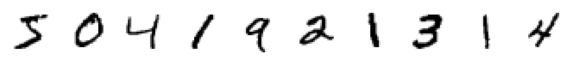

In [42]:
_, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

In [43]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [46]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images= train_images.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

test_images = test_images.reshape((10000, 28, 28, 1))
test_images= test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 43s 854us/step - loss: 0.2071 - accuracy: 0.9346 - val_loss: 0.0582 - val_accuracy: 0.9827
Epoch 2/5
50000/50000 [==============================] - 42s 836us/step - loss: 0.0538 - accuracy: 0.9830 - val_loss: 0.0526 - val_accuracy: 0.9844
Epoch 3/5
50000/50000 [==============================] - 42s 830us/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0419 - val_accuracy: 0.9881
Epoch 4/5
50000/50000 [==============================] - 41s 826us/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0464 - val_accuracy: 0.9869
Epoch 5/5
50000/50000 [==============================] - 41s 822us/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0456 - val_accuracy: 0.9889


In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

10000/10000 [==============================] - 3s 277us/step
Accuracy: 0.9890000224113464
Loss:  0.035324207320522695


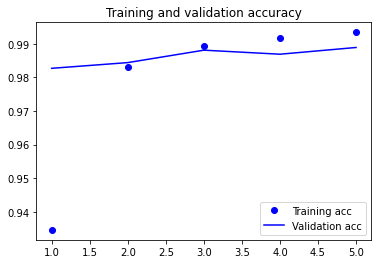

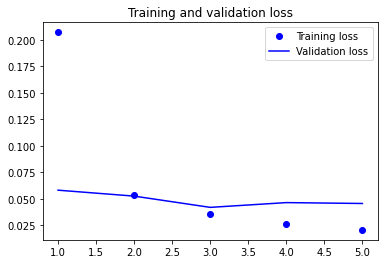

In [48]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
plot_accuracy_and_loss(history)